<a href="https://dacon.io/competitions/official/42473/codeshare/429?page=1&dtype=recent">본문 링크</a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False
from matplotlib import rc
rc('font', family='AppleGothic')
import seaborn as sns
import numpy as np
from collections import Counter
import warnings
warnings.filterwarnings('ignore')


Bad key "axes.titlelocation" on line 10 in
C:\Users\gon2gon2\.matplotlib\stylelib\mystyle.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key "axes.titlecolor" on line 13 in
C:\Users\gon2gon2\.matplotlib\stylelib\mystyle.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
train = pd.read_csv("C:/kaggle_data/credit/train.csv")
print(train.shape)

(3362796, 8)


# 2. preprocessing
## 2.1 outlier 제거

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


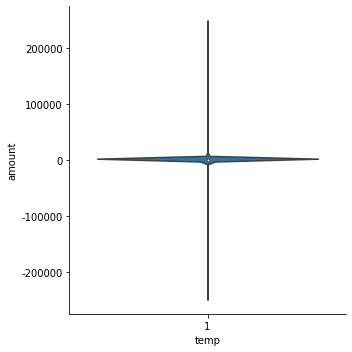

In [3]:
# catplot은 FacetGrid에 다양한 plot들을 subplot으로 구ㅡ려줄 수 있음
# seaborn
train["temp"] = 1
sns.catplot(data=train, x="temp", y="amount", kind="violin")

In [4]:
amount = train['amount']

In [5]:
percentage_99 = np.percentile(train["amount"], 99)
percentage_98 = np.percentile(train["amount"], 98)

In [6]:
print('최대:', amount.max())
print('99%:', percentage_99)
print('98%:', percentage_98)

최대: 250000
99%: 1335.0
98%: 800.0


-> 아하 대부분의 데이터, 약 98%가 1000 이하에 있구나!

-1000 <= amount <= 1000 외의 데이터들은 outlier로 간주

In [7]:
# outlier 제거
train = train.loc[(train['amount']>=-1000)&(train['amount']<=1000)]

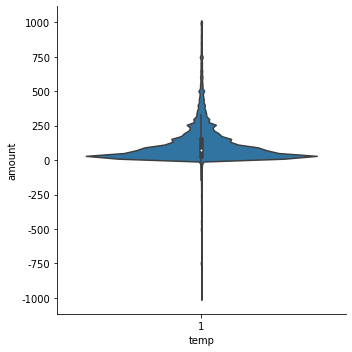

In [8]:
sns.catplot(data=train, x="temp", y="amount", kind="violin")

## 2.2 결측값 처리

In [9]:
train.isnull().sum()

store_id              0
date                  0
time                  0
card_id               0
amount                0
installments    3301841
days_of_week          0
holyday               0
temp                  0
dtype: int64

In [10]:
# 일시불을 의미하는 null값을 1로 처리
train.loc[train['installments'].isnull(),"installments"] = 1

## 2.3 Make Total Column

amount = total / installments

-> total = amount * installments

In [11]:
# 위의 생각대로 계산하는 게 맞는지 확인하려고
temp = train[train['installments']!=1.0]
temp[:10]

,store_id,date,time,card_id,amount,installments,days_of_week,holyday,temp
152,0,2016-12-21,10:48:04,65d5e33f69,445,3.0,2,0,1
155,0,2016-12-21,11:16:17,65d5e33f69,-445,3.0,2,0,1
206,0,2016-12-21,14:26:24,4a8e737d2c,277,2.0,2,0,1
311,0,2016-12-21,22:17:30,3f59e8684b,375,3.0,2,0,1
651,0,2016-12-24,11:59:37,583d5dd51c,408,3.0,5,0,1
689,0,2016-12-24,17:56:05,27822a80ea,553,3.0,5,0,1
787,0,2016-12-25,09:13:22,631e51fc9b,284,2.0,6,1,1
820,0,2016-12-25,13:46:11,f43931314a,389,3.0,6,1,1
878,0,2016-12-25,17:39:20,ebd094203a,266,3.0,6,1,1
887,0,2016-12-25,18:20:29,66fe71edb4,553,3.0,6,1,1


In [12]:
train['total'] = train['amount']*train['installments']

# 4. Data Analysis & Feature Engineering

In [13]:
del train['temp']

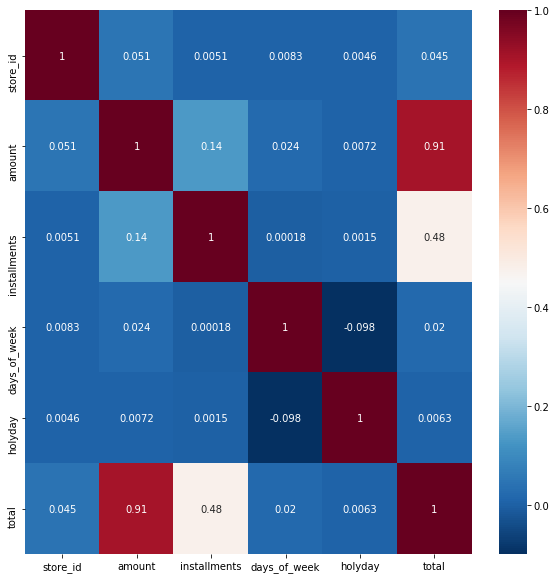

In [14]:
plt.figure(figsize=(10, 10))
sns.heatmap(train[train.columns].corr(), cmap="RdBu_r", annot=True)

## 4.1 store_id
- store_id의 countplot을 확인해보자

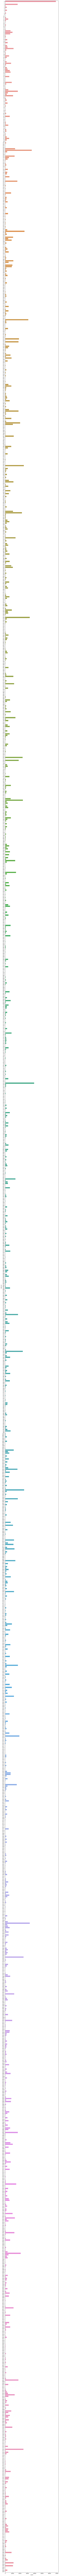

In [15]:
figure,ax = plt.subplots()
figure.set_size_inches(10,500)
sns.countplot(data=train, y='store_id')

- store_id의 숨겨진 경향성을 확인하고자 했으나 주목할만한 것이 없음.
- 가게마다 count의 편차가 크다

=> store_id의 개수가 1799개 있으므로, 상위 10개만 df형태로 확인해보자

In [16]:
train.shape

(3311411, 9)

In [17]:
count_list = []
for i in range(1799):
    train_temp = train.loc[train['store_id']==i]
    values = {"count":train_temp.shape[0]} # row의 개수
    count_list.append(values)

In [18]:
count_list = pd.DataFrame.from_dict(count_list)
count_list = count_list.sort_values(by="count", ascending=False)
count_list.index.name = 'store_id'

In [19]:
count_list.head(10)

,count
store_id,
0,68715
753,39217
105,35999
1342,33325
428,33281
221,31404
161,26108
1038,25694
323,25219


- 상위 10개의 가게를 확인해보았다
- 가장 많은 가게의 store_id는 0,68715건이다.
- 10번쨰로 기록이 많은 store_id는 1336이며, 24940건이다.
- 상위 10개의 가게들은 유동인구가 많은 곳에 위치해 접근성이 높거나, 충성도 높은 고객들을 보유하고 있을 것이다.

하위 10개의 가게

In [20]:
count_list.tail(10)

,count
store_id,
951,0
617,0
1600,0
601,0
255,0
11,0
1681,0
1216,0
506,0


In [21]:
print(train['date'].min())
print(train['date'].max())

2016-08-01
2018-07-31


하위 10개의 가게들은 모두 2016-08-01부터 2018-07-31까지 아무 기록이 없는 가게들임.

총 몇개의 가게들이 거래 기록이 없는지 확인해보겠음

In [22]:
count_list_0 = count_list.loc[count_list["count"] == 0]
count_list_0.shape[0]

55

## 4.2 date&time
- date와 time 칼럼을 이용해 year, month, day, hour, minute, second 칼럼을 생성

In [25]:
def split_date(date):
    return date.split("-")

In [ ]:
# 원래 코드
# 굳이 lambda로 split_date함수를 감쌀 필요가 없다고 생각해서 결과와 수행시간 비교
# train["year"], train["month"], train["day"] = zip(*train['date'].apply(lambda x: split_date(x)))

In [26]:
%%time
train['date'].apply(split_date)

Wall time: 3.76 s


0          [2016, 12, 14]
1          [2016, 12, 14]
2          [2016, 12, 19]
3          [2016, 12, 19]
4          [2016, 12, 19]
                ...      
3362791    [2018, 07, 19]
3362792    [2018, 07, 19]
3362793    [2018, 07, 22]
3362794    [2018, 07, 25]
3362795    [2018, 07, 30]
Name: date, Length: 3311411, dtype: object

In [27]:
%%time
train['date'].apply(lambda x: split_date(x))

Wall time: 4.33 s


0          [2016, 12, 14]
1          [2016, 12, 14]
2          [2016, 12, 19]
3          [2016, 12, 19]
4          [2016, 12, 19]
                ...      
3362791    [2018, 07, 19]
3362792    [2018, 07, 19]
3362793    [2018, 07, 22]
3362794    [2018, 07, 25]
3362795    [2018, 07, 30]
Name: date, Length: 3311411, dtype: object

In [28]:
%%time
a = zip(train['date'].apply(split_date))

Wall time: 4.68 s


In [29]:
%%time
b = zip(*train['date'].apply(split_date))

Wall time: 10 s


In [30]:
# 별이 없으면 각 칼럼에 할당이 안 된다
# train["year_a"], train["month_a"], train["day_a"] = a
train["year"], train["month"], train["day"] = b

In [31]:
def split_time(time):
    return time.split(":")
train["hour"], train["minute"], train["second"] = zip(*train['time'].apply(split_time))

In [32]:
train["year"] = train["year"].astype(int)
train["month"] = train["month"].astype(int)
train["day"] = train["day"].astype(int)
train["hour"] = train["hour"].astype(int)
train["minute"] = train["minute"].astype(int)
train["second"] = train["second"].astype(int)

In [33]:
train.head()

,store_id,date,time,card_id,amount,installments,days_of_week,holyday,total,year,month,day,hour,minute,second
0,0,2016-12-14,18:05:31,d297bba73f,5,1.0,2,0,5.0,2016,12,14,18,5,31
1,0,2016-12-14,18:05:54,d297bba73f,-5,1.0,2,0,-5.0,2016,12,14,18,5,54
2,0,2016-12-19,12:42:31,0880849c05,144,1.0,0,0,144.0,2016,12,19,12,42,31
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,1.0,0,0,66.0,2016,12,19,12,48,8
4,0,2016-12-19,13:31:08,7ad237eed0,24,1.0,0,0,24.0,2016,12,19,13,31,8


## 4.2.1 year

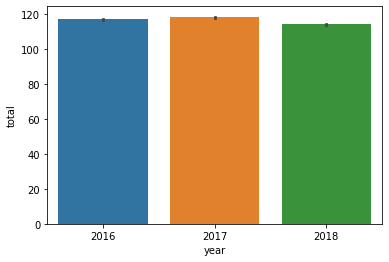

In [34]:
# 연도별 금액 총액 평균 확인
sns.barplot(data=train, x='year', y='total')

In [35]:
print(train[train['year']==2016].total.mean())
print(train[train['year']==2017].total.mean())
print(train[train['year']==2018].total.mean())

117.05103677525143
118.37491036860949
114.41798339914045


## 4.2.4 month

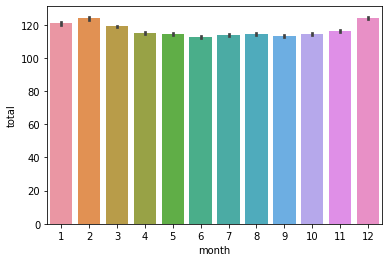

In [36]:
fig,ax=plt.subplots()
# figure.set_size_inches(10,4)
sns.barplot(data=train,x='month',y='total')

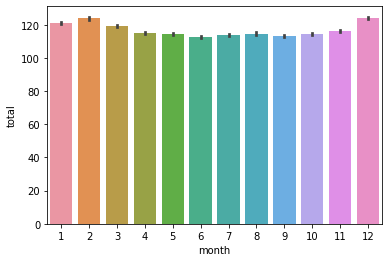

In [37]:
fig,ax=plt.subplots()
figure.set_size_inches(10,4)
sns.barplot(data=train,x='month',y='total')

- 월별 평균 총액 확인
- 12월이 가장 높고 6월이 가장 낮은 것을 확인.
- 12월에는 연말 할인이 빈번하기 때문에 경제 활도이 가장 많다고 예측해 볼 수 있다.

## 4.2.3 day

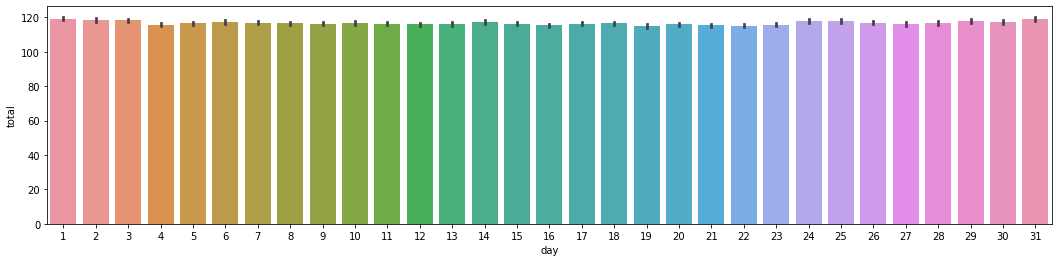

In [38]:
figure, ax = plt.subplots()
figure.set_size_inches(18, 4)
sns.barplot(data=train, x="day", y="total")

- 24일부터 3일까지의 평균 매출 총액이 가장 높다
- 급여일과 관계가 있다고 판단
- year, month,day에 대한 countplot을 한 곳에 시각화

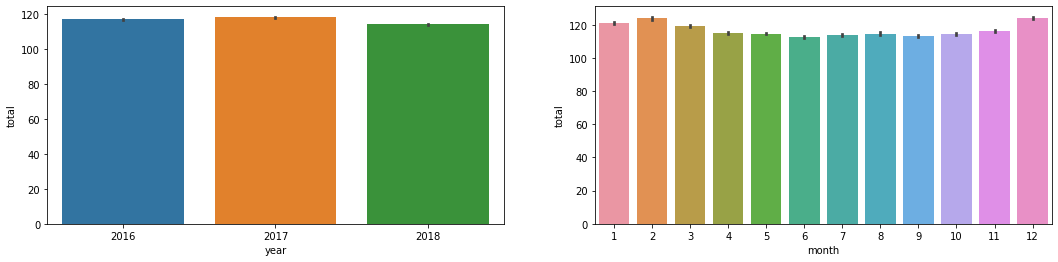

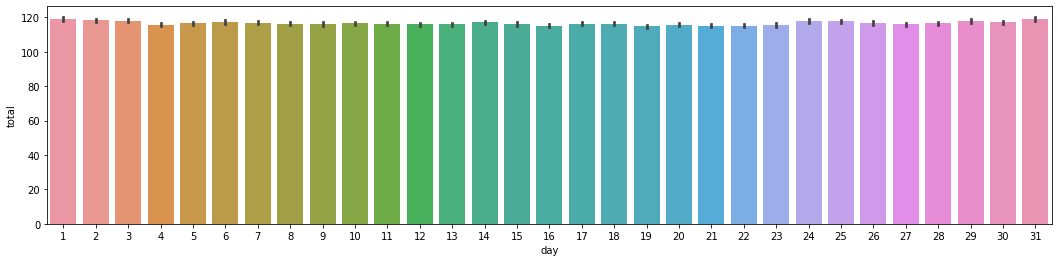

In [39]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 4)
sns.barplot(data=train, x="year", y="total", ax=ax1)
sns.barplot(data=train, x="month", y="total", ax=ax2)

figure, ax3 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18, 4)
sns.barplot(data=train, x="day", y="total", ax=ax3)

## 4.2.4 days_of_week

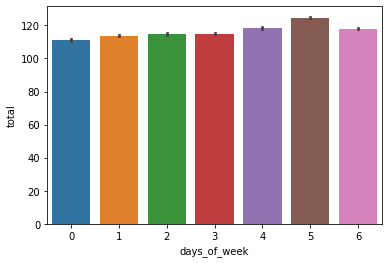

In [40]:
sns.barplot(x='days_of_week',y='total',data=train)

In [41]:
# 칼럼 순서를 임의로 변경하는 방법?
# sns.barplot(x=[[0.,1.,2.,4.,5.,6.,3.]],y='total',data=train)

TypeError: unhashable type: 'list'

- 월요일(0)부터 토요일(6)까지 구준하게 상승해 토요일에서 peak를 보임
- 토요일 일요일 둘 다 주말이지만 토요일이 더 높음
- 주말에 경제활동이 많은 것을 확인

holyday를 기준으로 살펴보기

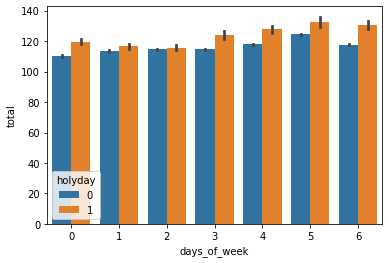

In [42]:
sns.barplot(data=train, x="days_of_week", y="total", hue="holyday")

예측대로 평일에 비해 공휴일이 더 높고, 그 차이는 금,토,일에 더 크게 드러난다

## 4.2.5 hour

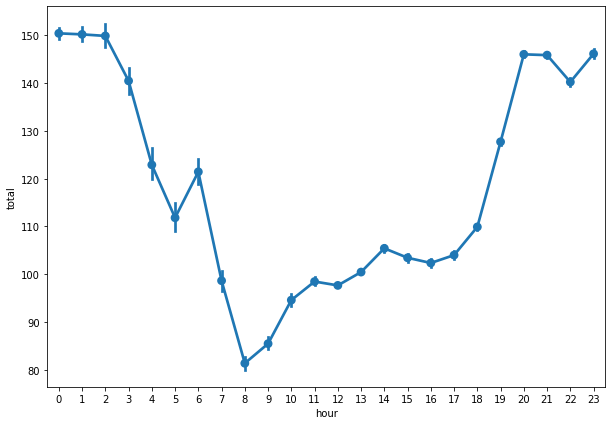

In [43]:
plt.figure(figsize=(10, 7))
sns.pointplot(data=train, x="hour", y="total")

- 퇴근시간인 6시부터 급격히 상승
- 새벽 2시에 peak
- 이후 줄어들면서 오전8시까지 하락

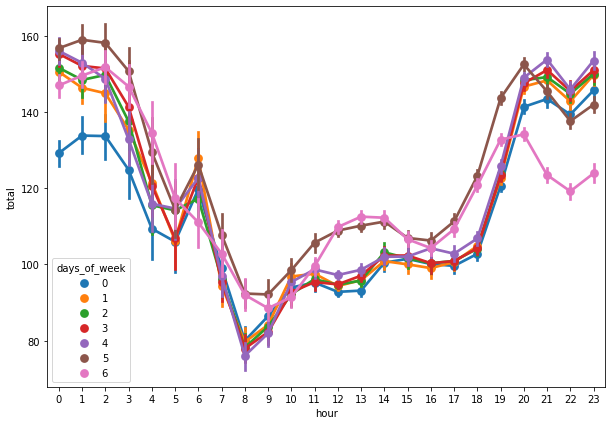

In [44]:
# 요일별로 나눠서 확인
plt.figure(figsize=(10, 7))
sns.pointplot(data=train, x="hour", y="total", hue="days_of_week")

- 일요일을 제외하고 비슷하게 나타남
- 일요일은 8시 이후부터 매출액이 감소 (다음날 출근을 위해 자제하는 모습)
- 월요일은 다른 요링레 비해 자정~2시까지의 매출이 적다(월요일은 빠른 귀가)

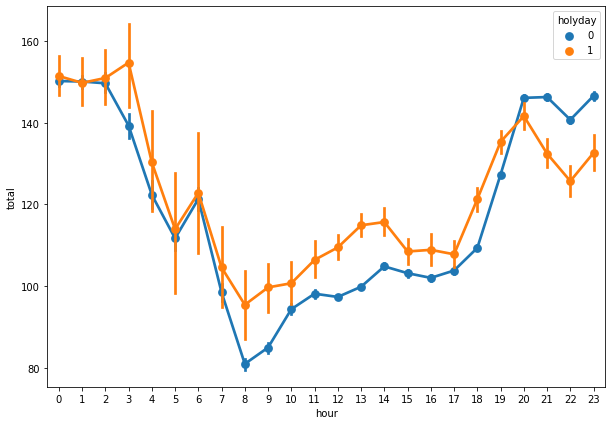

In [45]:
# 공휴일/평일 기준으로 시간별 매출 총액 확인
plt.figure(figsize=(10, 7))
sns.pointplot(data=train, x="hour", y="total", hue="holyday")

- 전체적으로 공휴일의 매출이 평일보다 높음 (7 AM ~ 7 PM)
- 공휴일의 시간별 매출 총액의 편차는 평일보다 크게 나타난다(막대기)
    - 다음날도 쉬는 날인지에 따라 차이가 난다고 판단하여 이를 확인하기 위해 다음날이 휴일인지 알려주는 칼럼 생성
    - 다음날이 주말이나 공휴일이면 1, 아니면 0

In [46]:
train["nextday_holiday"] = 0
# 금요일과 토요일은 다음날이 주말이므로 우선 1로 처리
train.loc[(train["days_of_week"] == 4) | (train["days_of_week"] == 5), "nextday_holiday"] = 1

In [47]:
train["nextday_year"] = train["year"]
train["nextday_month"] = train["month"]

In [48]:
train["nextday_day"] = train["day"] + 1

### 2016년

In [49]:
# 2016년 12월 31일의 다음날은 2017년 1월 1이므로 연도와 월, 날짜 모두 변경되어야 한다
train.loc[(train["nextday_day"] == 32) & (train["year"] == 2016) & (train["month"] == 12), "nextday_year"] = train["year"] + 1
train.loc[(train["nextday_day"] == 32) & (train["year"] == 2016) & (train["month"] == 12), "nextday_month"] = 1

# 마지막 날짜가 31일인 달(12월 제외)
train.loc[(train["nextday_day"] == 32) & (train["year"] == 2016) & ((train["month"] == 8) | (train["month"] == 10) | (train["month"] == 12)), "nextday_day"] = 1
train.loc[(train["nextday_day"] == 32) & (train["year"] == 2016) & ((train["month"] == 8) | (train["month"] == 10)), "nextday_month"] = train["month"] + 1

# 마지막 날짜가 30일인 달
train.loc[(train["nextday_day"] == 31) & (train["year"] == 2016) & ((train["month"] == 9) | (train["month"] == 11)), "nextday_day"] = 1
train.loc[(train["nextday_day"] == 31) & (train["year"] == 2016) & ((train["month"] == 9) | (train["month"] == 11)), "nextday_month"] = train["month"] + 1

### 2017년

In [50]:
# 2017년 12월 31일의 다음날은 2018년 1월 1이므로 연도와 월, 날짜 모두 변경되어야 한다
train.loc[(train["nextday_day"] == 32) & (train["year"] == 2017) & (train["month"] == 12), "nextday_year"] = train["year"] + 1
train.loc[(train["nextday_day"] == 32) & (train["year"] == 2017) & (train["month"] == 12), "nextday_month"] = 1
# 마지막 날짜가 31일인 달(12월 제외)
train.loc[(train["nextday_day"] == 32) & (train["year"] == 2017) & ((train["month"] == 1) | (train["month"] == 3) | (train["month"] == 5) | (train["month"] == 7) | (train["month"] == 8) | (train["month"] == 10) | (train["month"] == 12)), "nextday_day"] = 1
train.loc[(train["nextday_day"] == 32) & (train["year"] == 2017) & ((train["month"] == 1) | (train["month"] == 3) | (train["month"] == 5) | (train["month"] == 7) | (train["month"] == 8) | (train["month"] == 10)), "nextday_month"] = train["month"] + 1
# 마지막 날짜가 30일인 달
train.loc[(train["nextday_day"] == 31) & (train["year"] == 2017) & ((train["month"] == 4) | (train["month"] == 6) | (train["month"] == 9) | (train["month"] == 11)), "nextday_day"] = 1
train.loc[(train["nextday_day"] == 31) & (train["year"] == 2017) & ((train["month"] == 4) | (train["month"] == 6) | (train["month"] == 9) | (train["month"] == 11)), "nextday_month"] = train["month"] + 1
# 마지막 날짜가 28일인 달
train.loc[(train["nextday_day"] == 29) & (train["year"] == 2017) & (train["month"] == 2), "nextday_day"] = 1
train.loc[(train["nextday_day"] == 29) & (train["year"] == 2017) & (train["month"] == 2), "nextday_month"] = train["month"] + 1

### 2018년

In [51]:
# 마지막 날짜가 31일인 달
train.loc[(train["nextday_day"] == 32) & (train["year"] == 2017) & ((train["month"] == 1) | (train["month"] == 3) | (train["month"] == 5) | (train["month"] == 7) | (train["month"] == 8)), "nextday_day"] = 1
train.loc[(train["nextday_day"] == 32) & (train["year"] == 2017) & ((train["month"] == 1) | (train["month"] == 3) | (train["month"] == 5) | (train["month"] == 7) | (train["month"] == 8)), "nextday_month"] = train["month"] + 1
# 마지막 날짜가 30일인 달
train.loc[(train["nextday_day"] == 31) & (train["year"] == 2017) & ((train["month"] == 4) | (train["month"] == 6)), "nextday_day"] = 1
train.loc[(train["nextday_day"] == 31) & (train["year"] == 2017) & ((train["month"] == 4) | (train["month"] == 6)), "nextday_month"] = train["month"] + 1
# 마지막 날짜가 28일인 달
train.loc[(train["nextday_day"] == 29) & (train["year"] == 2017) & (train["month"] == 2), "nextday_day"] = 1
train.loc[(train["nextday_day"] == 29) & (train["year"] == 2017) & (train["month"] == 2), "nextday_month"] = train["month"] + 1

In [52]:
train["nextday_year_str"] = train["nextday_year"].astype(str)
train["nextday_month_str"] = train["nextday_month"].astype(str)
train["nextday_day_str"] = train["nextday_day"].astype(str)

In [53]:
# nextday_month, day 컬럼에서 그 값이 한 자리인 경우 앞에 "0"을 추가
for month in range(10):
    train.loc[(train["nextday_month_str"] == str(month)), "nextday_month_str"] = "0" + str(month)
for day in range(10):
    train.loc[(train["nextday_day_str"] == str(day)), "nextday_day_str"] = "0" + str(day)

In [54]:
# next date 컬럼 생성
train["nextday_date"] = train["nextday_year_str"] + "-" + train["nextday_month_str"] + "-" + train["nextday_day_str"]

In [55]:
# 잘 되었나 확인
train[["date", "nextday_date"]].head()

,date,nextday_date
0,2016-12-14,2016-12-15
1,2016-12-14,2016-12-15
2,2016-12-19,2016-12-20
3,2016-12-19,2016-12-20
4,2016-12-19,2016-12-20


In [56]:
# holyday가 1인 경우를 train_holyday로 저장
train_holiday = train.loc[train["holyday"] == 1]

In [57]:
print(train_holiday.shape)
train_holiday.head()

(147622, 23)


,store_id,date,time,card_id,amount,installments,days_of_week,holyday,total,year,...,minute,second,nextday_holiday,nextday_year,nextday_month,nextday_day,nextday_year_str,nextday_month_str,nextday_day_str,nextday_date
772,0,2016-12-25,00:23:22,7df04debf0,79,1.0,6,1,79.0,2016,...,23,22,0,2016,12,26,2016,12,26,2016-12-26
773,0,2016-12-25,00:34:09,0cd162eeb9,151,1.0,6,1,151.0,2016,...,34,9,0,2016,12,26,2016,12,26,2016-12-26
774,0,2016-12-25,01:11:57,3c62f0c4fd,38,1.0,6,1,38.0,2016,...,11,57,0,2016,12,26,2016,12,26,2016-12-26
775,0,2016-12-25,01:19:19,5d6c78f689,14,1.0,6,1,14.0,2016,...,19,19,0,2016,12,26,2016,12,26,2016-12-26
776,0,2016-12-25,01:22:11,5d6c78f689,25,1.0,6,1,25.0,2016,...,22,11,0,2016,12,26,2016,12,26,2016-12-26


In [58]:
my_list = train_holiday["date"].values
uniqueVals = np.unique(my_list)
holiday_date_list = uniqueVals.tolist()

In [59]:
holiday_date_list

['2016-08-15',
 '2016-09-14',
 '2016-09-15',
 '2016-09-16',
 '2016-10-03',
 '2016-10-09',
 '2016-12-25',
 '2017-01-01',
 '2017-01-27',
 '2017-01-28',
 '2017-01-29',
 '2017-01-30',
 '2017-03-01',
 '2017-05-01',
 '2017-05-03',
 '2017-05-05',
 '2017-05-09',
 '2017-06-06',
 '2017-08-15',
 '2017-10-02',
 '2017-10-03',
 '2017-10-04',
 '2017-10-05',
 '2017-10-06',
 '2017-10-09',
 '2017-12-25',
 '2018-01-01',
 '2018-02-15',
 '2018-02-16',
 '2018-02-17',
 '2018-03-01',
 '2018-05-01',
 '2018-05-05',
 '2018-05-07',
 '2018-05-22',
 '2018-06-06',
 '2018-06-13']

train 데이터의 next_date값이 holiday_date_list에 속해있으면, nextday_holiday컬럼의 값을 1로 채운다

In [60]:
idx = [idx for idx, value in enumerate(train["nextday_date"]) if value in holiday_date_list]

In [61]:
print(len(idx))
idx

147748


[625,
 626,
 627,
 628,
 629,
 630,
 631,
 632,
 633,
 634,
 635,
 636,
 637,
 638,
 639,
 640,
 641,
 642,
 643,
 644,
 645,
 646,
 647,
 648,
 649,
 650,
 651,
 652,
 653,
 654,
 655,
 656,
 657,
 658,
 659,
 660,
 661,
 662,
 663,
 664,
 665,
 666,
 667,
 668,
 669,
 670,
 671,
 672,
 673,
 674,
 675,
 676,
 677,
 678,
 679,
 680,
 681,
 682,
 683,
 684,
 685,
 686,
 687,
 688,
 689,
 690,
 691,
 692,
 693,
 694,
 695,
 696,
 697,
 698,
 699,
 700,
 701,
 702,
 703,
 704,
 705,
 706,
 707,
 708,
 709,
 710,
 711,
 712,
 713,
 714,
 715,
 716,
 717,
 718,
 719,
 720,
 721,
 722,
 723,
 724,
 725,
 726,
 727,
 728,
 729,
 730,
 731,
 732,
 733,
 734,
 735,
 736,
 737,
 738,
 739,
 740,
 741,
 742,
 743,
 744,
 745,
 746,
 747,
 748,
 749,
 750,
 751,
 752,
 753,
 754,
 755,
 756,
 757,
 758,
 759,
 760,
 761,
 762,
 763,
 764,
 765,
 766,
 767,
 768,
 769,
 770,
 771,
 1507,
 1508,
 1509,
 1510,
 1511,
 1512,
 1513,
 1514,
 1515,
 1516,
 1517,
 1518,
 1519,
 1520,
 1521,
 1522,
 1523,

In [64]:
# 에러 발생
# train.loc[idx, "nextday_holiday"].apply(lambda x : 1)

# 시간이 너무 오래 걸린다...
from tqdm import tqdm
for i in tqdm(idx):
    train.loc[i,'nextday_holiday'] = 1

  4%|██▉                                                                       | 5842/147748 [04:19<1:32:39, 25.52it/s]

KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(10, 7))
sns.pointplot(data=train, x="hour", y="total", hue="nextday_holiday")

- 모든 시간에 대해 다음날이 휴일이면 매출이 더 높다
- 시간별 매출 총액의 편차가 훨씬 적어졌다 (holyday로 구분할지, nextday_holiday로 구분할지)

In [ ]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 4)
sns.pointplot(data=train, x="hour", y="total", hue="holyday", ax=ax1)
sns.pointplot(data=train, x="hour", y="total", hue="nextday_holiday", ax=ax2)

우측의 편차가 훨씬 적다

## 4.3 amount

In [ ]:
sns.distplot(train["amount"])

- 환불을 제외한 대부분 매출액이 150 이하에서 일어나고 있다.
    -> 환불을 제외한 distplot을 그려보자

In [ ]:
# 환불기록을 삭제한 distplot
train_over0 = train.loc[train["amount"] >= 0]
sns.distplot(train_over0["amount"])

- amount의 분포 범위를 0 이상으로 제한시켜, 분포 범위를 좀 더 정확히 확인할 수 있다
- 20~40역역에서 가장 많은 매출이 있고, 대부분 100 이하
- amount칼럼은 좌편향되어 있어서 model에 적용하기 위해선 normalize필요
    - log transform 사용

In [ ]:
train_over0["amount_plus_one"] = (train_over0["amount"]) + 1
train_over0["log_amount"] = (np.log(train_over0["amount_plus_one"]))

In [ ]:
sns.distplot(train_over0["log_amount"])

## 4.4 total, installments
- total 칼럼의 값이 0 이상인 경우에 한해 total과 installments의 상관관계 확인

In [ ]:
total_over0 = train.loc[train["total"] >= 0]

In [ ]:
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
plt.figure(figsize=(10, 7))
sns.scatterplot(data=total_over0, x="installments", y="total", hue="year", palette=cmap)

- total과 installments의 상관관계를 sactterplot으로 확인
- total이 높을수록 installments도 높아진다
- why: 높은 금액을 한번에 결제하기 어려우니까